# Tutorial 7: Financial Time Series Data

In this tutorial, we will look at financial time series - namely, the evolution of stock prices at the stock market. There is a naturally high interest in the analysis of this kind of data, and an even higher interest in predicting the evolution of these prices. If one correctly predicts the evolution of prices for several stocks, one can buy and sell at the right times and obtain 

In [1]:
!pip install matplotlib
!pip install qiskit
!pip install qiskit-finance

     |████████████████████████████████| 50 kB 4.1 MB/s eta 0:00:011
     |████████████████████████████████| 159 kB 10.7 MB/s eta 0:00:01


In [1]:
%matplotlib inline
from qiskit_finance import QiskitFinanceError
from qiskit_finance.data_providers import *
import datetime
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()

# TODO: Let us first work with randomly generated fake stock market data
# generated for 2 stocks (tickers) between 01.01.2022 and 30.01.2022
data = RandomDataProvider(
    tickers=["TICKER1", "TICKER2"],
    start=datetime.datetime(2022, 1, 1),
    end=datetime.datetime(2022, 1, 30),
    seed=1,
)

# TODO: find the function that loads the data into a RandomDataProvider
data.run()

The underlying evolution of stock prices:


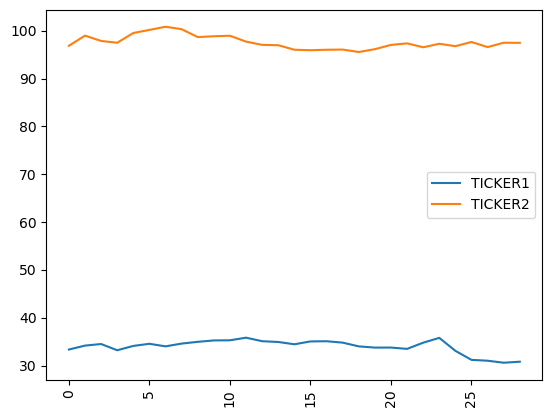

TICKER1
[33.345584192064784, 34.167202335565946, 34.49763941174933, 33.19448218014497, 34.099838046818086, 34.5462126191821, 34.009259383821814, 34.59037748801817, 34.95494988420424, 35.24908238085977, 35.27750462217556, 35.82421760878801, 35.08776352178634, 34.92485357379329, 34.442734261113316, 35.04158047374794, 35.0813025812296, 34.78884583026451, 34.00693736790767, 33.7497451272888, 33.757887307807145, 33.48228440250777, 34.77634821690598, 35.783072532211776, 33.07191005324581, 31.182896807278134, 31.008124715222973, 30.585934303646617, 30.799577301145227]
TICKER2
[96.8774156647853, 98.99525441983634, 97.88323365714406, 97.50562865001707, 99.5484002575094, 100.19510325371124, 100.85816662608751, 100.34416025440004, 98.69608508354439, 98.86354982776713, 98.97256391558868, 97.7452118613441, 97.06198519956354, 96.98994151983632, 96.04518989677554, 95.94691992892332, 96.04240295639278, 96.07798919344826, 95.57169753513395, 96.16544560691977, 97.0566125612021, 97.37746086576867, 96.559

In [2]:
# TODO: 
# Use simple printing and then matplotlib to visualize
# the evolution of the underlying data inside the "data" RandomDataProvider
print("The underlying evolution of stock prices:")
for (cnt, s) in enumerate(data._tickers):
    plt.plot(data._data[cnt], label=s)
plt.legend()
plt.xticks(rotation=90)
plt.show()

for (cnt, s) in enumerate(data._tickers):
    print(s)
    print(data._data[cnt])

In [3]:
# TODO: Let's get some statistical metrics on the data
# Namely: the mean of each stock, the similarity matrix between the stocks
# And the covariance matrix
# Hint: no need to create new code for that, they are already defined for
# any qiskit-finance (Random)DataProvider

means = data.get_mean_vector() # TODO
print("Means:")
print(means)

rho = data.get_similarity_matrix() # TODO
print("A time-series similarity measure:")
print(rho)
# TODO : display the similarity matrix using matplotlib

cov = data.get_covariance_matrix() # TODO
print("A covariance matrix:")
print(cov)
# TODO : display the covariance matrix using matplotlib

Means:
[33.97683271 97.61130683]
A time-series similarity measure:
[[1.00000000e+00 5.41888011e-04]
 [5.41888011e-04 1.00000000e+00]]
A covariance matrix:
[[2.08413157 0.20842107]
 [0.20842107 1.99542187]]


In [4]:
stocks = ["GOOG", "AAPL", "MSFT", "TWTR"]

# TODO: To get this access token, go to
# https://data.nasdaq.com/sign-up
# and create a free student account

token = "ubjjiV8S5aAEcU1yWjQX" # TODO: copy-paste your own token here

try:
    wiki = WikipediaDataProvider(
        # TODO : add the necessary parameters here
        # To extract data between 01.01.2018 and 30.01.2018
        token=token,
        tickers=stocks,
        start=datetime.datetime(2018, 1, 1),
        end=datetime.datetime(2018, 1, 30)
    )
    
    # TODO : call the necessary function to actually load the data
    wiki.run()
except QiskitFinanceError as ex:
    print(ex)
    print("Error retrieving data.")

In [5]:
if wiki._data:
  # TODO: same exercise as above, compute the 
  # statistical metrics to get some insight on your data
  # and then display them using matplotlib

  rho = data.get_similarity_matrix()
  print("The time-series similarity measure:")
  print(rho)

  cov = data.get_covariance_matrix()
  print("The covariance matrix:")
  print(cov)

else:
    print("Wiki data provider is empty.")

The time-series similarity measure:
[[1.00000000e+00 5.41888011e-04]
 [5.41888011e-04 1.00000000e+00]]
The covariance matrix:
[[2.08413157 0.20842107]
 [0.20842107 1.99542187]]


The underlying evolution of stock prices:


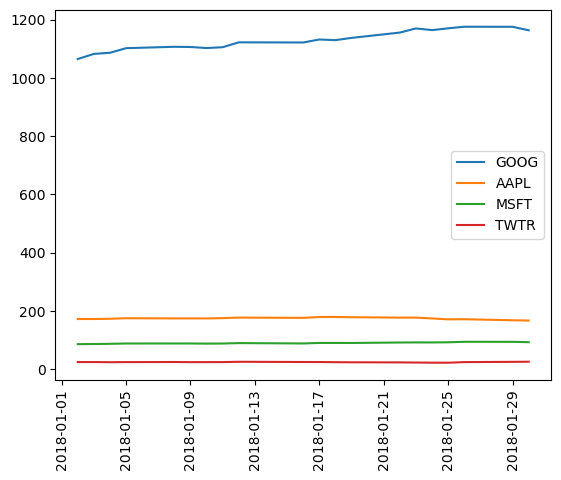

GOOG
Date
2018-01-02    1065.00
2018-01-03    1082.48
2018-01-04    1086.40
2018-01-05    1102.23
2018-01-08    1106.94
2018-01-09    1106.26
2018-01-10    1102.61
2018-01-11    1105.52
2018-01-12    1122.26
2018-01-16    1121.76
2018-01-17    1131.98
2018-01-18    1129.79
2018-01-19    1137.51
2018-01-22    1155.81
2018-01-23    1169.97
2018-01-24    1164.24
2018-01-25    1170.37
2018-01-26    1175.84
2018-01-29    1175.58
2018-01-30    1163.69
Name: Adj. Close, dtype: float64
AAPL
Date
2018-01-02    172.26
2018-01-03    172.23
2018-01-04    173.03
2018-01-05    175.00
2018-01-08    174.35
2018-01-09    174.33
2018-01-10    174.29
2018-01-11    175.28
2018-01-12    177.09
2018-01-16    176.19
2018-01-17    179.10
2018-01-18    179.26
2018-01-19    178.46
2018-01-22    177.00
2018-01-23    177.04
2018-01-24    174.22
2018-01-25    171.11
2018-01-26    171.51
2018-01-29    167.96
2018-01-30    166.97
Name: Adj. Close, dtype: float64
MSFT
Date
2018-01-02    85.95
2018-01-03    86.35
2018

In [6]:
if wiki._data:
    print("The underlying evolution of stock prices:")
    # TODO: identically as before, plot the evolution
    # of the stocks in the wiki dataloader
    for (cnt, s) in enumerate(stocks):
        plt.plot(wiki._data[cnt], label=s)
    plt.legend()
    plt.xticks(rotation=90)
    plt.show()

    for (cnt, s) in enumerate(stocks):
        print(s)
        print(wiki._data[cnt])
else:
    print("No wiki data loaded.")

Homework: 

Could you use quantum to predict how these prices fluctuate?
If so, how?